In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Loading Data

In [2]:
df = pd.read_csv('mothers_pleasure.csv')
df.head()

,тип_ребенка,гендер,вынес_мусор,подмел,пропылесосил,помыл_посуду,сделал_уроки,настроение_мамы
0,старший,сын,да,нет,нет,нет,нет,нейтральна
1,средний,сын,да,да,нет,нет,нет,недовольна
2,младший,сын,нет,на половину,нет,нет,нет,довольна
3,старший,дочь,нет,нет,на половину,нет,нет,недовольна
4,средний,дочь,да,нет,нет,нет,нет,недовольна


In [3]:
df.shape

(756, 8)

In [4]:
df.describe().round(2)

,тип_ребенка,гендер,вынес_мусор,подмел,пропылесосил,помыл_посуду,сделал_уроки,настроение_мамы
count,756,756,756,756,756,756,756,756
unique,3,2,3,3,3,3,3,3
top,старший,сын,да,нет,нет,нет,нет,нейтральна
freq,252,381,428,417,543,644,633,260


In [5]:
df.dtypes

тип_ребенка        object
гендер             object
вынес_мусор        object
подмел             object
пропылесосил       object
помыл_посуду       object
сделал_уроки       object
настроение_мамы    object
dtype: object

## Cleaning Data

In [6]:
df.isnull().sum()

тип_ребенка        0
гендер             0
вынес_мусор        0
подмел             0
пропылесосил       0
помыл_посуду       0
сделал_уроки       0
настроение_мамы    0
dtype: int64

## Charts

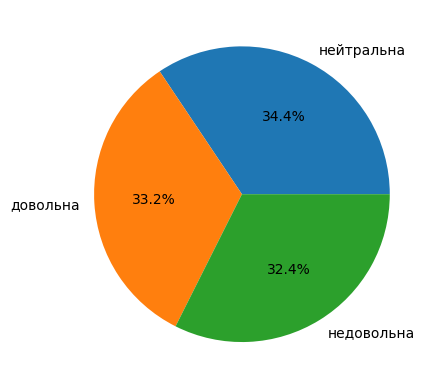

In [7]:
plt.pie(df['настроение_мамы'].value_counts(), labels=['нейтральна', 'довольна', 'недовольна'], autopct='%1.1f%%')
plt.show()

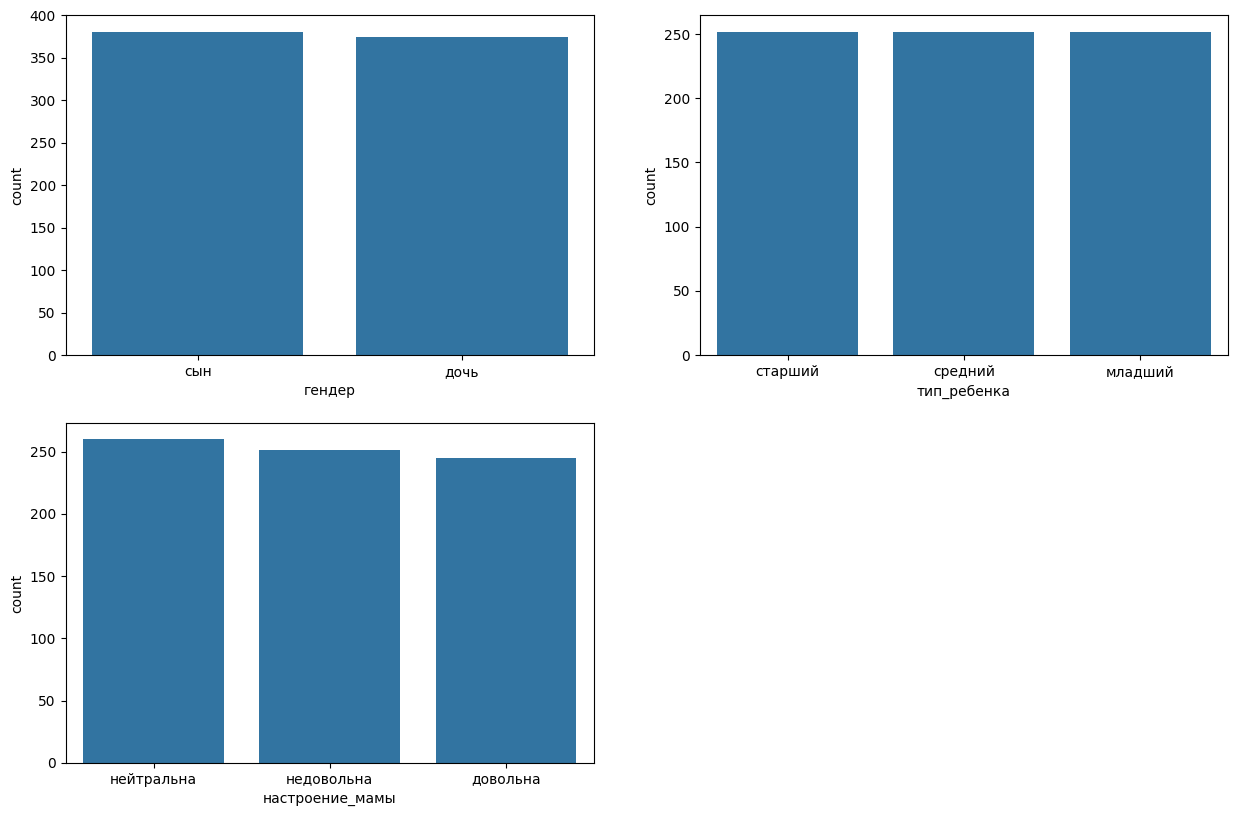

In [8]:
cols = ['гендер', 'тип_ребенка', 'настроение_мамы']
plt.figure(figsize=(15, 15))
for i, col in enumerate(cols):
    plt.subplot(3, 2, i + 1) # 3 - rows, 2 - columns i + 1 - index
    sns.countplot(x=col, data=df)

plt.show()

## Encoding Data

In [6]:
encoders = {}

columns = df.select_dtypes(include='object').drop(columns='настроение_мамы').columns

for col in columns:
    encoders[col] = LabelEncoder()
    encoders[col].fit(df[col])
    df[col] = encoders[col].transform(df[col])

df.head()

,тип_ребенка,гендер,вынес_мусор,подмел,пропылесосил,помыл_посуду,сделал_уроки,настроение_мамы
0,2,1,0,2,2,2,2,нейтральна
1,1,1,0,0,2,2,2,недовольна
2,0,1,2,1,2,2,2,довольна
3,2,0,2,2,1,2,2,недовольна
4,1,0,0,2,2,2,2,недовольна


In [7]:
df.dtypes

тип_ребенка         int64
гендер              int64
вынес_мусор         int64
подмел              int64
пропылесосил        int64
помыл_посуду        int64
сделал_уроки        int64
настроение_мамы    object
dtype: object

## Editional Charts

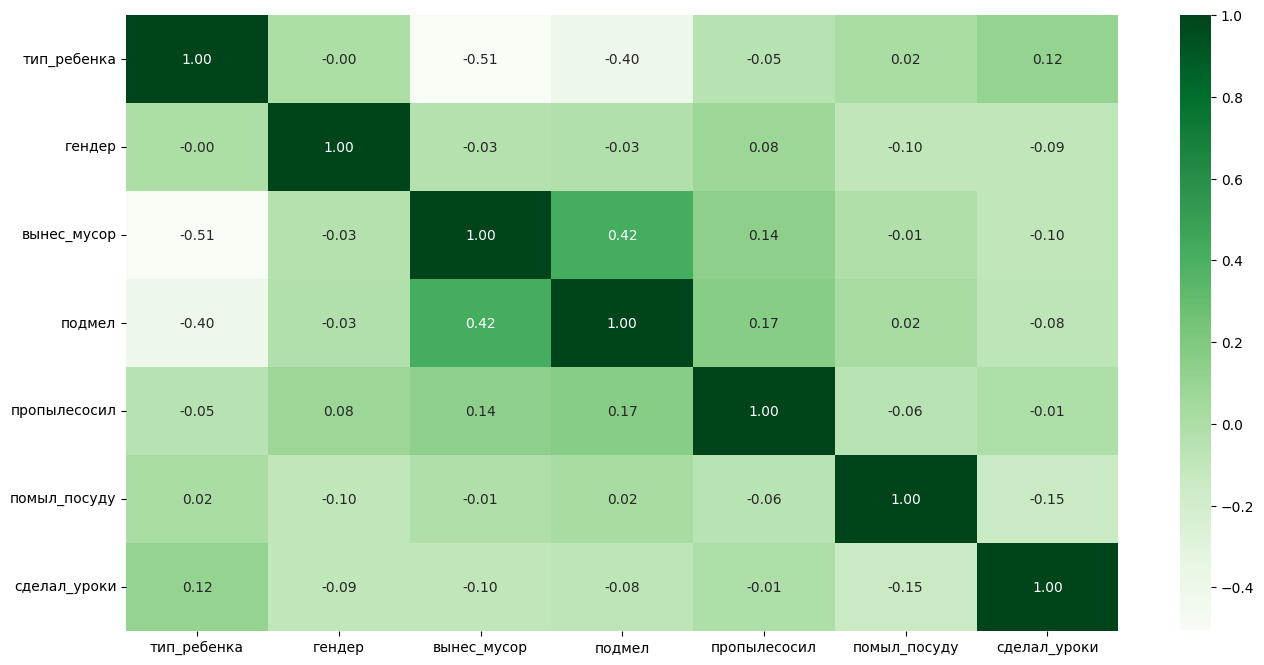

In [11]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.drop(columns='настроение_мамы').corr(), annot=True, fmt='.2f', cmap='Greens')# зависимость колонок друг от друга
plt.show()

In [12]:
df.drop(columns='настроение_мамы').corr()

,тип_ребенка,гендер,вынес_мусор,подмел,пропылесосил,помыл_посуду,сделал_уроки
тип_ребенка,1.000000e+00,-8.633541e-18,-0.506695,-0.404653,-0.047670,0.015348,0.116269
гендер,-8.633541e-18,1.000000e+00,-0.034368,-0.025136,0.076123,-0.097071,-0.091538
вынес_мусор,-5.066951e-01,-3.436787e-02,1.000000,0.417540,0.137698,-0.014240,-0.098482
подмел,-4.046534e-01,-2.513561e-02,0.417540,1.000000,0.168042,0.023024,-0.083981
пропылесосил,-4.767037e-02,7.612304e-02,0.137698,0.168042,1.000000,-0.056254,-0.009885
помыл_посуду,1.534773e-02,-9.707143e-02,-0.014240,0.023024,-0.056254,1.000000,-0.147225
сделал_уроки,1.162695e-01,-9.153832e-02,-0.098482,-0.083981,-0.009885,-0.147225,1.000000


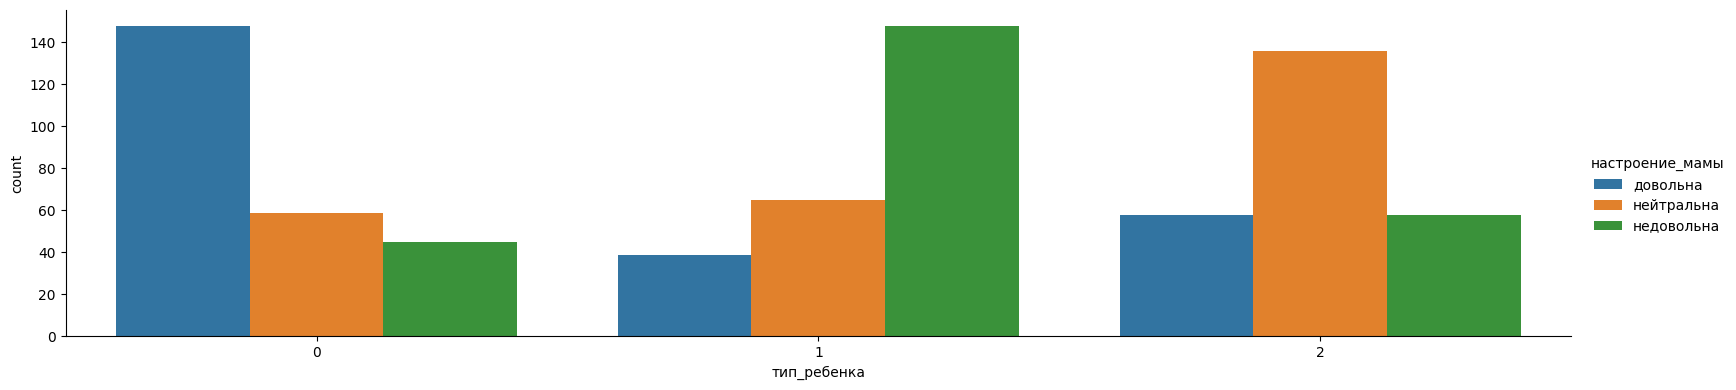

In [13]:
sns.catplot(data=df, x='тип_ребенка', height=4, aspect=4, kind='count', hue='настроение_мамы') # to cut , order=range(7, 73)
plt.show()

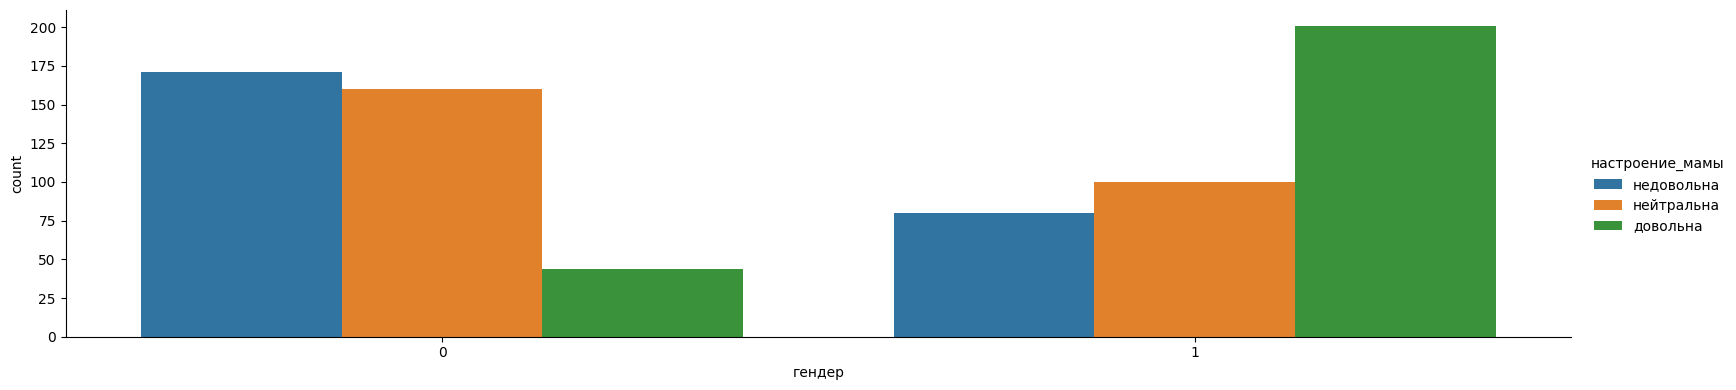

In [14]:
sns.catplot(data=df, x='гендер', height=4, aspect=4, kind='count', hue='настроение_мамы') # to cut , order=range(7, 73)
plt.show()

## Creating Model and Testing with Own Data 

In [8]:
X = df.drop(columns='настроение_мамы')
X.head()

,тип_ребенка,гендер,вынес_мусор,подмел,пропылесосил,помыл_посуду,сделал_уроки
0,2,1,0,2,2,2,2
1,1,1,0,0,2,2,2
2,0,1,2,1,2,2,2
3,2,0,2,2,1,2,2
4,1,0,0,2,2,2,2


In [9]:
y = df['настроение_мамы']
y.head()

0    нейтральна
1    недовольна
2      довольна
3    недовольна
4    недовольна
Name: настроение_мамы, dtype: object

In [10]:
model = DecisionTreeClassifier()
model.fit(X, y)
model

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [11]:
test_data = {
    'тип_ребенка': [1], # 1 - средний 2 - старший  0 - младший
    'гендер': [2], # 1 - сын, 2 - дочь
    'вынес_мусор': [0], # 0 - да 2 - нет  1 - на половину
    'подмел': [0],
    'пропылесосил': [0],
    'помыл_посуду': [2],
    'сделал_уроки': [2]
}
test_df = pd.DataFrame(test_data)
test_df

,тип_ребенка,гендер,вынес_мусор,подмел,пропылесосил,помыл_посуду,сделал_уроки
0,1,2,0,0,0,2,2


In [12]:
model.predict(test_df)

array(['нейтральна'], dtype=object)

In [25]:
test_data_without_encoding = {
    'тип_ребенка': ['младший'], 
    'гендер': ['сын'],
    'вынес_мусор': ['нет'],
    'подмел': ['нет'],
    'пропылесосил': ['нет'],
    'помыл_посуду': ['нет'],
    'сделал_уроки': ['на половину']
}
test_df_without_encoding = pd.DataFrame(test_data_without_encoding)
test_df_without_encoding

,тип_ребенка,гендер,вынес_мусор,подмел,пропылесосил,помыл_посуду,сделал_уроки
0,младший,сын,нет,нет,нет,нет,на половину


In [26]:
for col in columns:
    test_df_without_encoding[col] = encoders[col].transform(test_df_without_encoding[col])

test_df_without_encoding

,тип_ребенка,гендер,вынес_мусор,подмел,пропылесосил,помыл_посуду,сделал_уроки
0,0,1,2,2,2,2,1


In [27]:
model.predict(test_df_without_encoding)

array(['довольна'], dtype=object)

## Export to the .dot file

In [23]:
tree.export_graphviz(model, out_file='mother_model.dot', feature_names=['тип_ребенка', 'гендер','вынес_мусор', 'подмел', 'пропылесосил', 'помыл_посуду','сделал_уроки'], filled=True, class_names=sorted(y.unique()))

## Train_Test_Split and Accuracy_Score

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train

,тип_ребенка,гендер,вынес_мусор,подмел,пропылесосил,помыл_посуду,сделал_уроки
116,0,0,2,2,2,2,1
438,2,1,0,2,2,2,2
755,0,0,2,2,0,2,2
265,1,1,0,0,2,2,2
148,1,0,0,0,2,2,2
...,...,...,...,...,...,...,...
316,1,0,0,0,2,0,2
195,2,0,2,0,2,2,2
238,1,0,0,0,2,0,2
730,1,0,0,2,2,2,2


In [34]:
train_test_split_model = DecisionTreeClassifier()
train_test_split_model

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [35]:
train_test_split_model.fit(X_train, y_train)
train_test_split_model

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [36]:
predictions = train_test_split_model.predict(X_test)
predictions

array(['недовольна', 'недовольна', 'недовольна', 'довольна', 'довольна',
       'недовольна', 'нейтральна', 'недовольна', 'недовольна', 'довольна',
       'довольна', 'недовольна', 'недовольна', 'недовольна', 'нейтральна',
       'недовольна', 'недовольна', 'довольна', 'недовольна', 'нейтральна',
       'недовольна', 'довольна', 'довольна', 'нейтральна', 'довольна',
       'нейтральна', 'нейтральна', 'нейтральна', 'довольна', 'нейтральна',
       'довольна', 'довольна', 'недовольна', 'недовольна', 'недовольна',
       'недовольна', 'довольна', 'недовольна', 'довольна', 'нейтральна',
       'нейтральна', 'довольна', 'нейтральна', 'нейтральна', 'нейтральна',
       'довольна', 'довольна', 'довольна', 'довольна', 'нейтральна',
       'довольна', 'нейтральна', 'нейтральна', 'нейтральна', 'недовольна',
       'нейтральна', 'довольна', 'нейтральна', 'недовольна', 'довольна',
       'нейтральна', 'недовольна', 'нейтральна', 'нейтральна', 'довольна',
       'нейтральна', 'довольна', 'довольна'

In [37]:
model_score = accuracy_score(y_test, predictions)
f'{round(model_score * 100, 2)} %'

'98.68 %'

In [44]:
tree.export_graphviz(train_test_split_model, out_file='train_test_split_mother_model.dot', feature_names=['тип_ребенка', 'гендер','вынес_мусор', 'подмел', 'пропылесосил', 'помыл_посуду','сделал_уроки'], filled=True, class_names=sorted(y.unique()))

## Saving model

In [43]:
joblib.dump(train_test_split_model, 'train_test_split_mother_model.joblib')
joblib.dump(model, 'mother_model.joblib')

['mother_model.joblib']